# Importing libraries

In [1]:
# libraries that are requried for building ML model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Data processing and outlier 

In [2]:
df = pd.read_csv("dataframe_.csv",sep=',')
df.fillna(df.mean(), inplace=True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df > lower_bound) & (df < upper_bound)].dropna()

# Linear Regression model

Mean Absolute Error: 32.23991633850688
Mean Squared Error: 1526.1300130161696
R2 Score: 0.340851166313878


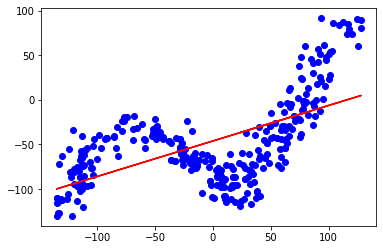

In [3]:
# seperating input and output values
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluating the model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error( y_pred,y_test)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


# plotting the results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.show()

# Random Forest regression model

Mean Squared Error: 38.85890291897413
R2 Score: 0.9840134484054598
Mean Absolute Error: 4.226053054066086


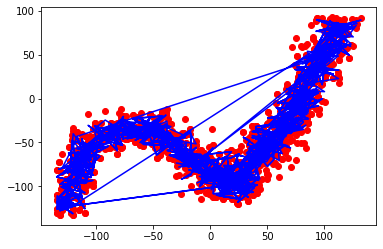

In [4]:
# Extract input and output columns
X = df['input'].values.reshape(-1, 1)
y = df['output'].values.reshape(-1, 1)

# Fit the random forest regression model
model = RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(X, y.ravel())

# Predict the output using the fitted model
y_pred = model.predict(X)

# Calculate mean squared error
mse = np.mean((y_pred - y.ravel())**2)
print("Mean Squared Error:", mse)
r2 = r2_score(y.ravel(), y_pred)
print("R2 Score:", r2)
mae = mean_absolute_error(y.ravel(), y_pred)
print("Mean Absolute Error:", mae)


# plotting the results
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.show()

# Support Vector Machine

Mean Squared Error: 1602.7847396883153
R2 Score: 0.34061440207418525
Mean Absolute Error: 32.7962870428144


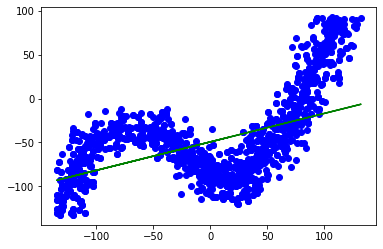

In [5]:
X = df['input'].values.reshape(-1, 1)
y = df['output'].values.reshape(-1, 1)

# Fit the support vector regression model
model = SVR(kernel='linear')
model.fit(X, y.ravel())

# Predict the output using the fitted model
y_pred = model.predict(X)

# Calculate mean squared error
mse = np.mean((y_pred - y.ravel())**2)
print("Mean Squared Error:", mse)
r2 = r2_score(y.ravel(), y_pred)
print("R2 Score:", r2)
mae = mean_absolute_error(y.ravel(), y_pred)
print("Mean Absolute Error:", mae)



# plotting the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green')
plt.show()

# Neural network model

Mean Squared Error: 444.47311820940723
R2 Score: 0.8171437713654206
Mean Absolute Error: 16.499396065153878


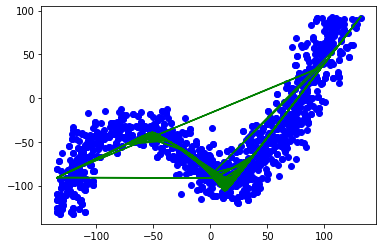

In [6]:
# Extract input and output columns
X = df['input'].values.reshape(-1, 1)
y = df['output'].values.reshape(-1, 1)

# Fit the neural network model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
model.fit(X, y.ravel())

# Predict the output using the fitted model
y_pred = model.predict(X)

# Calculate mean squared error
mse = np.mean((y_pred - y.ravel())**2)
print("Mean Squared Error:", mse)
r2 = r2_score(y.ravel(), y_pred)
print("R2 Score:", r2)
mae = mean_absolute_error(y.ravel(), y_pred)
print("Mean Absolute Error:", mae)




# plotting the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green')
plt.show()